In [1]:
from admm_lasso import admm_lasso, plot
import numpy as np
from scipy import sparse

In [2]:
N_sample = 5000    #  Number of samples
Nx = 1500    #  Number of regressor
A = np.random.randn(N_sample,Nx)
A = np.dot(A, sparse.spdiags(1/np.sqrt(sum(np.multiply(A, A))), 0, Nx, Nx).todense())  # make it symmetric and normalize column



x0 = np.random.randn(Nx,1)
indices = np.random.choice(np.arange(x0.size), replace=False,
                           size=int(x0.size * 0.8))
x0[indices] = 0

b = A @ x0 + np.sqrt(0.001)*np.random.randn(N_sample, 1)

lambda_max = np.linalg.norm(np.dot(A.T, b), np.inf)
lambda_ = 0.1*lambda_max

rho = 1.0
alpha = 1.0    #  Over-relaxation: select alpha in [1.5, 1.8] to improve covergence.

N_iter = 100;

err, err_r = admm_lasso(A, b, x0, alpha = alpha, rho = rho, lambda_ = lambda_, N_iter = N_iter)

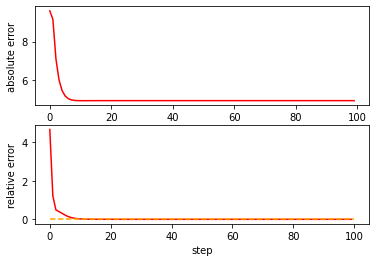

In [3]:
plot(err, err_r)